In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import torch
import pickle
import pandas as pd

In [2]:
df = pd.read_csv(
            "./data/pm25/Code/STMVL/SampleData/pm25_ground.txt",
            index_col="datetime",
            parse_dates=True,
        )

In [ ]:
mse_current = (
    ((samples_median.values - c_target) * eval_points) ** 2
) * (scaler ** 2)
mae_current = (
    torch.abs((samples_median.values - c_target) * eval_points) 
) * scaler
mre = (
    (torch.abs(c_target * scaler + mean_scaler)) * eval_points
)

In [7]:
df.std().values

array([ 75.4464833 ,  70.48815828,  72.5746035 ,  77.06838213,
        87.61533832,  74.94152789,  74.75946744,  78.28466817,
        76.42854438,  83.0662651 ,  84.02769455,  81.36676422,
        78.39706545,  86.75380088,  73.39870152,  81.49127345,
        91.9660876 ,  88.93857106,  93.96103211,  74.10713805,
        84.01343159,  81.02870513,  72.09609255,  71.44738944,
        67.62744234,  67.21263331,  66.22990919,  68.06357643,
        63.57796008,  71.73502083,  59.24896042,  60.46675754,
        62.85068212,  95.72836651,  91.79925174, 110.75299924])

In [5]:
path = "./data/pm25/pm25_meanstd.pk"
with open(path, "rb") as f:
    train_mean, train_std = pickle.load(f)

In [8]:
train_std

array([ 79.7104599 ,  74.60365778,  77.44130387,  80.93824204,
        90.55020926,  80.73716576,  79.57183029,  83.89937656,
        81.31281883,  87.5163351 ,  88.54831725,  86.09224228,
        83.57440189,  92.36467601,  78.67393445,  85.62109557,
        95.66191451,  92.05832841,  97.94406765,  78.14387384,
        87.42631703,  85.92324398,  77.1344752 ,  77.9505161 ,
        70.83870007,  72.10260033,  69.91213688,  71.38034674,
        66.80223424,  77.7001542 ,  63.25484463,  62.32676582,
        66.33581854,  99.15194545,  88.21199561, 111.23334083])

In [2]:
def get_quantile(samples,q,dim=1):
    return torch.quantile(samples,q,dim=dim).cpu().numpy()

In [4]:
dataset = 'healthcare' #choose 'healthcare' or 'airquality'
datafolder = 'pretrained' # set the folder name
nsample = 100 # number of generated sample

path = './save/'+datafolder+'/generated_outputs_nsample' + str(nsample) + '.pk' 
with open(path, 'rb') as f:
    samples,all_target,all_evalpoint,all_observed,all_observed_time,scaler,mean_scaler = pickle.load( f)

all_target_np = all_target.cpu().numpy()
all_evalpoint_np = all_evalpoint.cpu().numpy()
all_observed_np = all_observed.cpu().numpy()
all_given_np = all_observed_np - all_evalpoint_np

K = samples.shape[-1] #feature
L = samples.shape[-2] #time length

if dataset == 'airquality':
    path = 'data/pm25/pm25_meanstd.pk'
    with open(path, 'rb') as f:
        train_mean,train_std = pickle.load(f)
    train_std_cuda = torch.from_numpy(train_std).cuda()
    train_mean_cuda = torch.from_numpy(train_mean).cuda()
    all_target_np=(all_target_np*train_std+train_mean)
    samples=(samples*train_std_cuda+train_mean_cuda)

In [7]:

qlist =[0.05,0.25,0.5,0.75,0.95]
quantiles_imp= []
for q in qlist:
    quantiles_imp.append(get_quantile(samples, q, dim=1)*(1-all_given_np) + all_target_np * all_given_np)

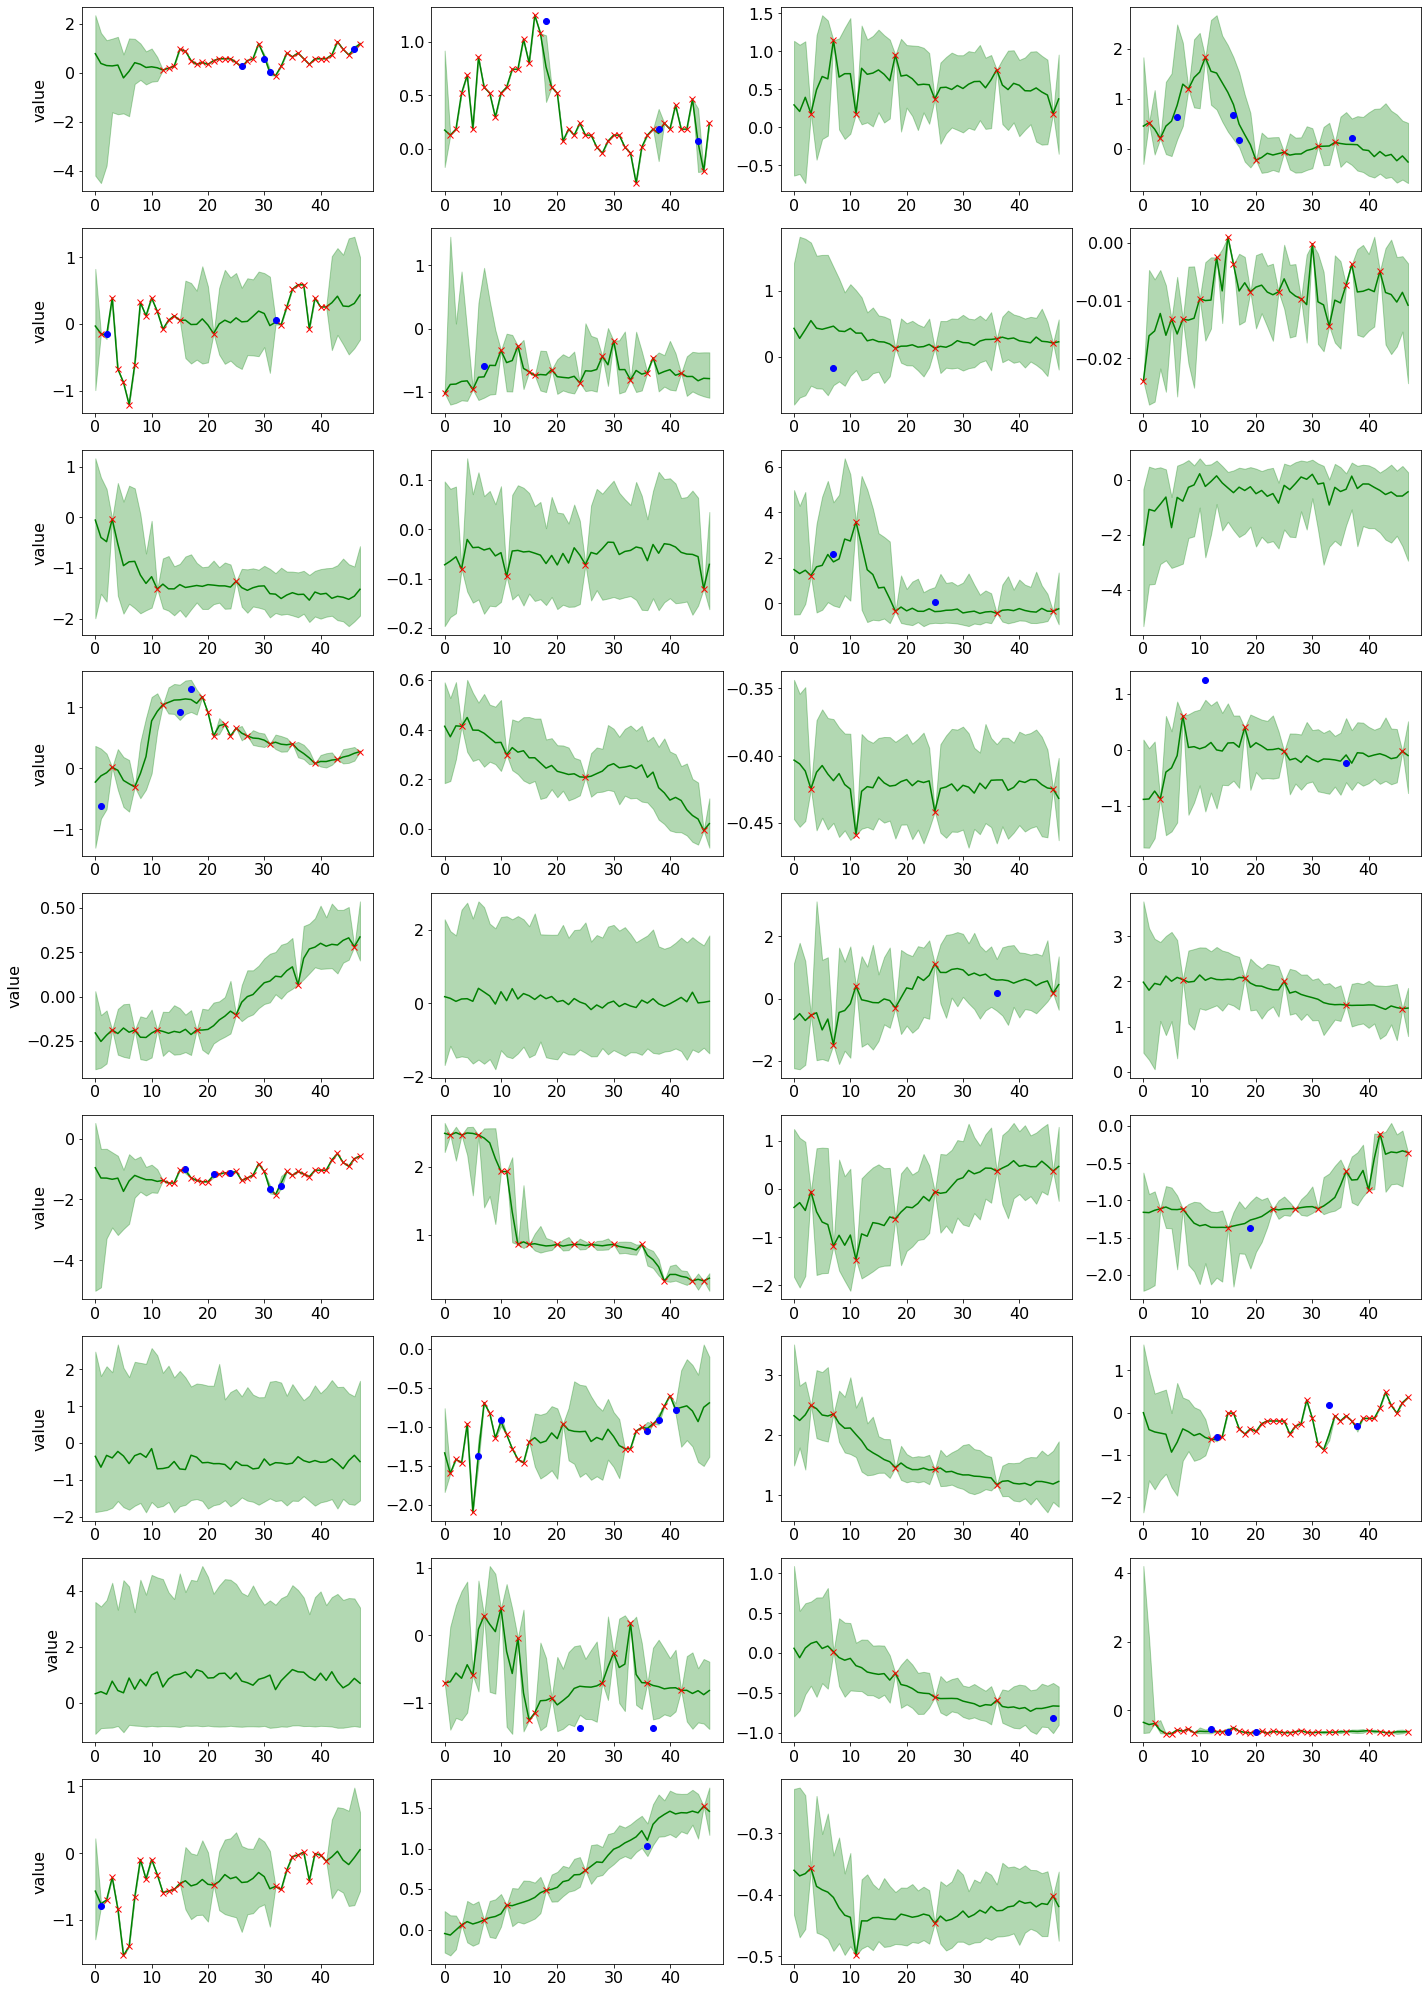

In [8]:
###healthcare###
dataind = 3 #change to visualize a different time-series sample

plt.rcParams["font.size"] = 16
fig, axes = plt.subplots(nrows=9, ncols=4,figsize=(24.0, 36.0))
fig.delaxes(axes[-1][-1])

for k in range(K):
    df = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,k], "y":all_evalpoint_np[dataind,:,k]})
    df = df[df.y != 0]
    df2 = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,k], "y":all_given_np[dataind,:,k]})
    df2 = df2[df2.y != 0]
    row = k // 4
    col = k % 4
    axes[row][col].plot(range(0,L), quantiles_imp[2][dataind,:,k], color = 'g',linestyle='solid',label='CSDI')
    axes[row][col].fill_between(range(0,L), quantiles_imp[0][dataind,:,k],quantiles_imp[4][dataind,:,k],
                    color='g', alpha=0.3)
    axes[row][col].plot(df.x,df.val, color = 'b',marker = 'o', linestyle='None')
    axes[row][col].plot(df2.x,df2.val, color = 'r',marker = 'x', linestyle='None')
    if col == 0:
        plt.setp(axes[row, 0], ylabel='value')
    if row == -1:
        plt.setp(axes[-1, col], xlabel='time')


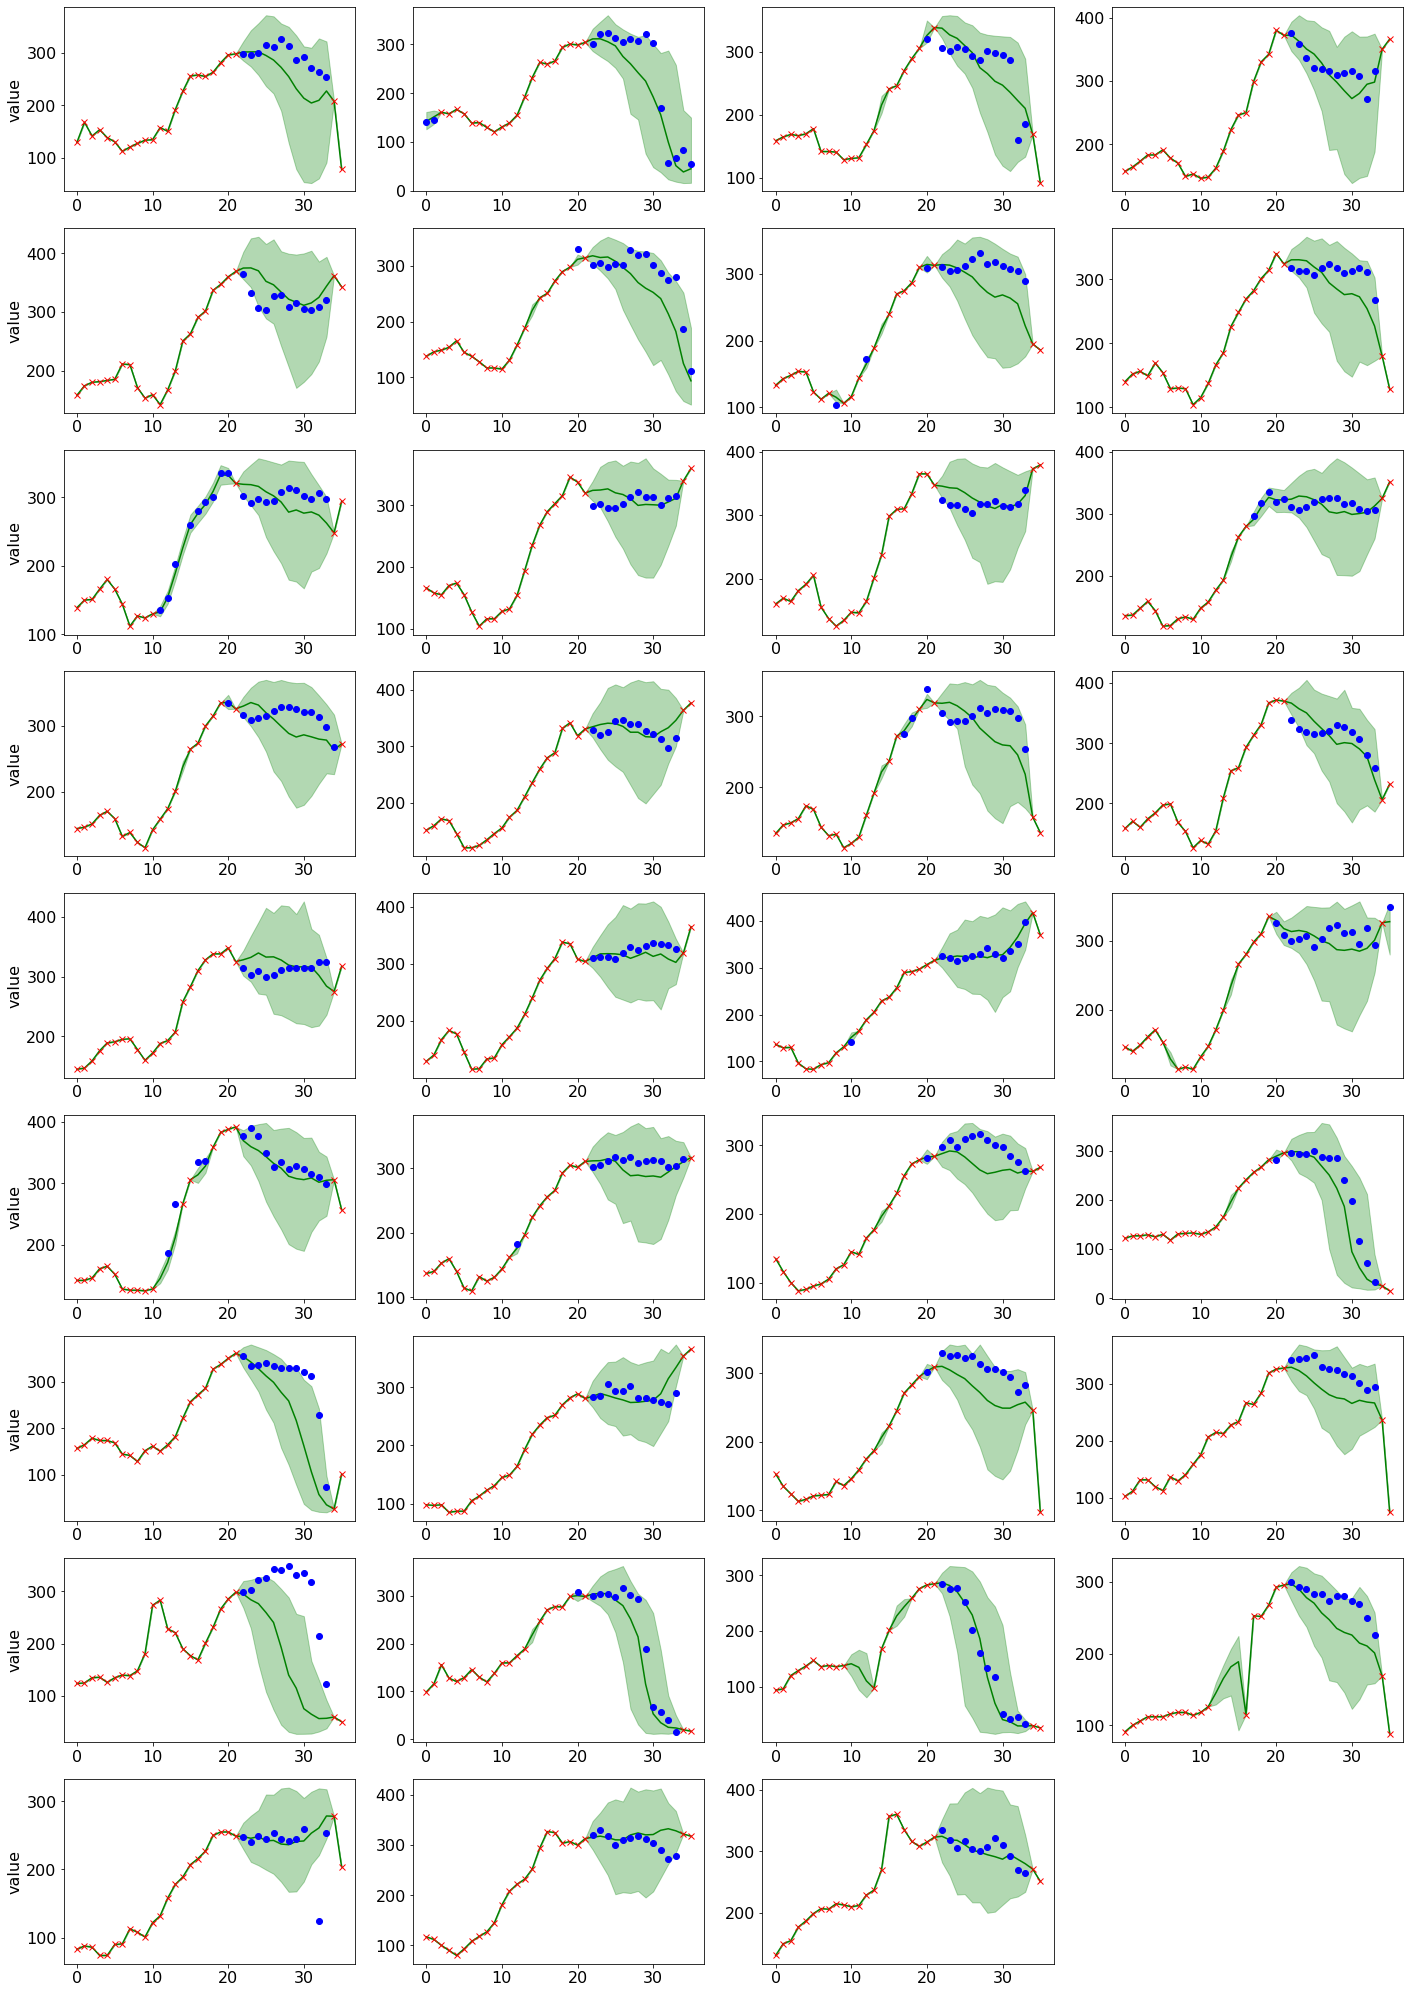

In [32]:
###airquality###
dataind = 10 #change to visualize a different sample

plt.rcParams["font.size"] = 16
fig, axes = plt.subplots(nrows=9, ncols=4,figsize=(24.0, 36.0))
fig.delaxes(axes[-1][-1])

for k in range(K):
    df = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,k], "y":all_evalpoint_np[dataind,:,k]})
    df = df[df.y != 0]
    df2 = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,k], "y":all_given_np[dataind,:,k]})
    df2 = df2[df2.y != 0]
    row = k // 4
    col = k % 4
    axes[row][col].plot(range(0,L), quantiles_imp[2][dataind,:,k], color = 'g',linestyle='solid',label='CSDI')
    axes[row][col].fill_between(range(0,L), quantiles_imp[0][dataind,:,k],quantiles_imp[4][dataind,:,k],
                    color='g', alpha=0.3)
    axes[row][col].plot(df.x,df.val, color = 'b',marker = 'o', linestyle='None')
    axes[row][col].plot(df2.x,df2.val, color = 'r',marker = 'x', linestyle='None')
    if col == 0:
        plt.setp(axes[row, 0], ylabel='value')
    if row == -1:
        plt.setp(axes[-1, col], xlabel='time')
